<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:40px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>✨ Analysis WhatsApp Data  ✨</b></div>

<h3 align="center" style="font-size: 35px; color: #800080; font-family: Georgia;">
    <span style="color: #008080;"> Author:</span> 
    <span style="color: black;">Tushar Tomer .📄🖋️</span>
</h3>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> 📚 Importing Libraries 📚</b></div>

In [271]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import re

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>⏳ Loading Datset ⏳</b></div>

In [272]:
f=open("WhatsApp_group_chat.txt",encoding="utf-8")

In [273]:
data=f.read()
print(data)

1/10/23, 13:22 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
8/22/22, 13:07 - Ruchika Madrid created group "Weekdays 10.30@Balmeetmam"
1/10/23, 12:40 - Ruchika Madrid added you
1/11/23, 20:41 - +91 82870 12906: hello Ma'am Please Share Todays Recording..
1/11/23, 20:42 - +91 82870 12906: @918899712843
1/11/23, 22:07 - Balmeet Mam Madrid: Will update tomorrow
1/16/23, 23:30 - Balmeet Mam Madrid: Hi everyone

All are requested to download all the recordings from the cloud zoom link that we shared in google sheet as we will be removing all the recordings from the cloud zoom server by *tomorrow evening 17-jan-2023* .
1/18/23, 10:40 - Balmeet Mam Madrid: <Media omitted>
1/18/23, 10:42 - Balmeet Mam Madrid: <Media omitted>
1/18/23, 10:42 - +91 98114 52967: For ques 10?
1/21/23, 12:28 - Chamma: @918899712843 ma'am please share the recording of last class...
1/21/23, 14:45 - Balmeet Mam Madrid: Shar

# Checking data type

In [274]:
type(data)

str

# Create a pattern for splitting the data through regex

In [275]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

# Split the data

In [276]:
messages=re.split(pattern,data)
messages

['',
 'Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Ruchika Madrid created group "Weekdays 10.30@Balmeetmam"\n',
 'Ruchika Madrid added you\n',
 "+91 82870 12906: hello Ma'am Please Share Todays Recording..\n",
 '+91 82870 12906: @918899712843\n',
 'Balmeet Mam Madrid: Will update tomorrow\n',
 'Balmeet Mam Madrid: Hi everyone\n\nAll are requested to download all the recordings from the cloud zoom link that we shared in google sheet as we will be removing all the recordings from the cloud zoom server by *tomorrow evening 17-jan-2023* .\n',
 'Balmeet Mam Madrid: <Media omitted>\n',
 'Balmeet Mam Madrid: <Media omitted>\n',
 '+91 98114 52967: For ques 10?\n',
 "Chamma: @918899712843 ma'am please share the recording of last class...\n",
 'Balmeet Mam Madrid: Shared\n',
 'Balmeet Mam Madrid: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho\n',
 'Balmeet Mam Madrid: d

# Checking type of message

In [277]:
type(messages)

list

# In the list of 0 index is empty so we fatch the data into 1 index.

In [278]:
messages=messages[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Ruchika Madrid created group "Weekdays 10.30@Balmeetmam"\n',
 'Ruchika Madrid added you\n',
 "+91 82870 12906: hello Ma'am Please Share Todays Recording..\n",
 '+91 82870 12906: @918899712843\n',
 'Balmeet Mam Madrid: Will update tomorrow\n',
 'Balmeet Mam Madrid: Hi everyone\n\nAll are requested to download all the recordings from the cloud zoom link that we shared in google sheet as we will be removing all the recordings from the cloud zoom server by *tomorrow evening 17-jan-2023* .\n',
 'Balmeet Mam Madrid: <Media omitted>\n',
 'Balmeet Mam Madrid: <Media omitted>\n',
 '+91 98114 52967: For ques 10?\n',
 "Chamma: @918899712843 ma'am please share the recording of last class...\n",
 'Balmeet Mam Madrid: Shared\n',
 'Balmeet Mam Madrid: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho\n',
 'Balmeet Mam Madrid: do EDA

# Fetch the data and time through regex pattern

In [279]:
dates=re.findall(pattern,data)
dates

['1/10/23, 13:22 - ',
 '8/22/22, 13:07 - ',
 '1/10/23, 12:40 - ',
 '1/11/23, 20:41 - ',
 '1/11/23, 20:42 - ',
 '1/11/23, 22:07 - ',
 '1/16/23, 23:30 - ',
 '1/18/23, 10:40 - ',
 '1/18/23, 10:42 - ',
 '1/18/23, 10:42 - ',
 '1/21/23, 12:28 - ',
 '1/21/23, 14:45 - ',
 '1/25/23, 12:27 - ',
 '1/25/23, 12:28 - ',
 '1/25/23, 14:37 - ',
 '1/25/23, 15:07 - ',
 '1/25/23, 17:55 - ',
 '1/26/23, 18:08 - ',
 '1/26/23, 18:09 - ',
 '1/26/23, 18:09 - ',
 '1/30/23, 10:41 - ',
 '1/30/23, 10:41 - ',
 '2/8/23, 22:41 - ',
 '2/8/23, 22:49 - ',
 '2/14/23, 11:58 - ',
 '2/14/23, 11:58 - ',
 '2/16/23, 10:39 - ',
 '2/16/23, 10:39 - ',
 '2/21/23, 18:11 - ',
 '2/21/23, 18:51 - ',
 '2/22/23, 10:40 - ']

# Create a dataframe of message and dates

In [280]:
df=pd.DataFrame({"user_message":messages,"message_date":dates})
df

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,"1/10/23, 13:22 -"
1,"Ruchika Madrid created group ""Weekdays 10.30@B...","8/22/22, 13:07 -"
2,Ruchika Madrid added you\n,"1/10/23, 12:40 -"
3,+91 82870 12906: hello Ma'am Please Share Toda...,"1/11/23, 20:41 -"
4,+91 82870 12906: @918899712843\n,"1/11/23, 20:42 -"
5,Balmeet Mam Madrid: Will update tomorrow\n,"1/11/23, 22:07 -"
6,Balmeet Mam Madrid: Hi everyone\n\nAll are req...,"1/16/23, 23:30 -"
7,Balmeet Mam Madrid: <Media omitted>\n,"1/18/23, 10:40 -"
8,Balmeet Mam Madrid: <Media omitted>\n,"1/18/23, 10:42 -"
9,+91 98114 52967: For ques 10?\n,"1/18/23, 10:42 -"


# Check info

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_message  31 non-null     object
 1   message_date  31 non-null     object
dtypes: object(2)
memory usage: 624.0+ bytes


# Convert message_date column into date time column

In [282]:
df["message_date"]=pd.to_datetime(df["message_date"],format='%m/%d/%y, %H:%M - ')

In [283]:
df

,user_message,message_date
0,Messages and calls are end-to-end encrypted. N...,2023-01-10 13:22:00
1,"Ruchika Madrid created group ""Weekdays 10.30@B...",2022-08-22 13:07:00
2,Ruchika Madrid added you\n,2023-01-10 12:40:00
3,+91 82870 12906: hello Ma'am Please Share Toda...,2023-01-11 20:41:00
4,+91 82870 12906: @918899712843\n,2023-01-11 20:42:00
5,Balmeet Mam Madrid: Will update tomorrow\n,2023-01-11 22:07:00
6,Balmeet Mam Madrid: Hi everyone\n\nAll are req...,2023-01-16 23:30:00
7,Balmeet Mam Madrid: <Media omitted>\n,2023-01-18 10:40:00
8,Balmeet Mam Madrid: <Media omitted>\n,2023-01-18 10:42:00
9,+91 98114 52967: For ques 10?\n,2023-01-18 10:42:00


# Check info after converting into date time column

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_message  31 non-null     object        
 1   message_date  31 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 624.0+ bytes


# Now we use feature engineering on message-date column.

In [285]:
df["year"]=df["message_date"].dt.year
df["month_name"]=df["message_date"].dt.month_name()
df["day"]=df["message_date"].dt.day
df["hour"]=df["message_date"].dt.hour
df["month"]=df["message_date"].dt.month
df["day_name"]=df["message_date"].dt.day_name()
df["Date"]=df["message_date"].dt.date

In [286]:
df.head()

,user_message,message_date,year,month_name,day,hour,month,day_name,Date
0,Messages and calls are end-to-end encrypted. N...,2023-01-10 13:22:00,2023,January,10,13,1,Tuesday,2023-01-10
1,"Ruchika Madrid created group ""Weekdays 10.30@B...",2022-08-22 13:07:00,2022,August,22,13,8,Monday,2022-08-22
2,Ruchika Madrid added you\n,2023-01-10 12:40:00,2023,January,10,12,1,Tuesday,2023-01-10
3,+91 82870 12906: hello Ma'am Please Share Toda...,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11
4,+91 82870 12906: @918899712843\n,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11


# Now we split or find user name and message both and create new column for user name and message.

In [287]:
users=[]
messages=[]
for i in df["user_message"]:
    print(i)
    if "change the subject" not in i:
        li=i.split(":",maxsplit=1)
    else:
        li=[]
        li.append()
    print(li)
    if len(li)>=2:
        users.append(li[0])
        messages.append(li[1])
    else:
        users.append("group notification")
        messages.append(li[0])
df["user"]=users
df["messages"]=messages

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n']
Ruchika Madrid created group "Weekdays 10.30@Balmeetmam"

['Ruchika Madrid created group "Weekdays 10.30@Balmeetmam"\n']
Ruchika Madrid added you

['Ruchika Madrid added you\n']
+91 82870 12906: hello Ma'am Please Share Todays Recording..

['+91 82870 12906', " hello Ma'am Please Share Todays Recording..\n"]
+91 82870 12906: @918899712843

['+91 82870 12906', ' @918899712843\n']
Balmeet Mam Madrid: Will update tomorrow

['Balmeet Mam Madrid', ' Will update tomorrow\n']
Balmeet Mam Madrid: Hi everyone

All are requested to download all the recordings from the cloud zoom link that we shared in google sheet as we will be removing all the recordings from the cloud zoom server by *tomorrow evening 17-jan-2023

# Drop the user message column after splitting the user message column.

In [288]:
df.drop(columns=["user_message"],inplace=True)

In [289]:
df.head()

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages
0,2023-01-10 13:22:00,2023,January,10,13,1,Tuesday,2023-01-10,group notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-22 13:07:00,2022,August,22,13,8,Monday,2022-08-22,group notification,"Ruchika Madrid created group ""Weekdays 10.30@B..."
2,2023-01-10 12:40:00,2023,January,10,12,1,Tuesday,2023-01-10,group notification,Ruchika Madrid added you\n
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Verdana;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>📊 Exploratory Data Analysis 📊</b></div>

# How big is the chatting ?

In [290]:
df.shape[0]

31

# How big is the chatting without any notification?

In [291]:
len(df[df["user"]!="group notification"])

28

# How many notification in the chat?

In [292]:
len(df[df["user"]=="group notification"])

3

# Find top 5 active user?

In [293]:
df["user"].value_counts()

Balmeet Mam Madrid    15
+91 82870 12906        6
+91 98114 52967        4
group notification     3
Chamma                 2
+91 99710 18062        1
Name: user, dtype: int64

In [294]:
df["user"].value_counts().head()

Balmeet Mam Madrid    15
+91 82870 12906        6
+91 98114 52967        4
group notification     3
Chamma                 2
Name: user, dtype: int64

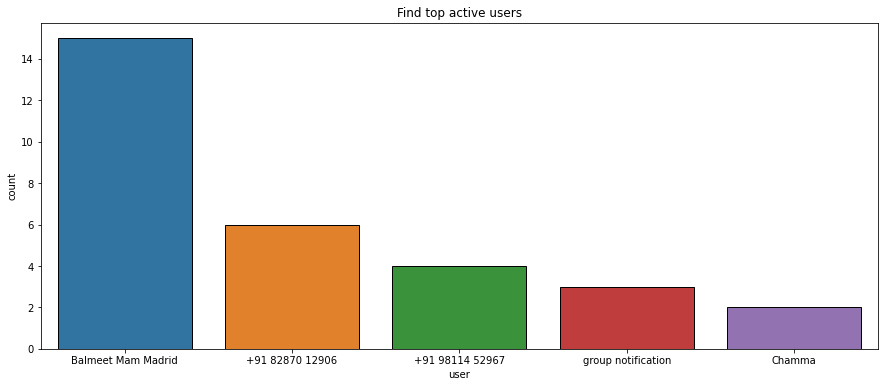

In [295]:
plt.figure(figsize=(15,6));
sns.countplot(data=df,x="user",order=df["user"].value_counts().head().index,edgecolor="k");
plt.title("Find top active users");

# Find least 5 active users?

In [296]:
df["user"].value_counts().tail()

+91 82870 12906       6
+91 98114 52967       4
group notification    3
Chamma                2
+91 99710 18062       1
Name: user, dtype: int64

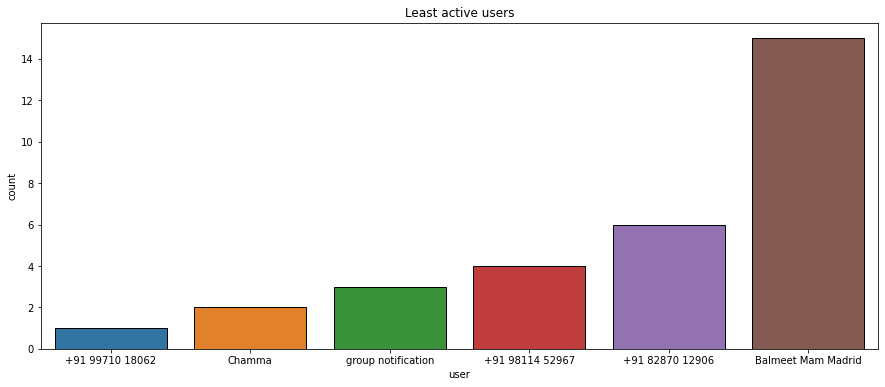

In [297]:
plt.figure(figsize=(15,6));
sns.countplot(data=df,x="user",order=df["user"].value_counts(ascending=True).index,edgecolor="k");
plt.title("Least active users");

# Find the total words in the chat ?

In [298]:
words=[]
for i in df["messages"]:
    l1=i.split()
    words.extend(l1)
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 'Ruchika',
 'Madrid',
 'created',
 'group',
 '"Weekdays',
 '10.30@Balmeetmam"',
 'Ruchika',
 'Madrid',
 'added',
 'you',
 'hello',
 "Ma'am",
 'Please',
 'Share',
 'Todays',
 'Recording..',
 '@918899712843',
 'Will',
 'update',
 'tomorrow',
 'Hi',
 'everyone',
 'All',
 'are',
 'requested',
 'to',
 'download',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'link',
 'that',
 'we',
 'shared',
 'in',
 'google',
 'sheet',
 'as',
 'we',
 'will',
 'be',
 'removing',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'server',
 'by',
 '*tomorrow',
 'evening',
 '17-jan-2023*',
 '.',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'For',
 'ques',
 '10?',
 '@918899712843',
 "ma'am",
 'please',
 'share',
 'the',
 'recording

In [299]:
len(words)

197

In [300]:
# There are 197 words in the chat.

In [301]:
df.head()

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages
0,2023-01-10 13:22:00,2023,January,10,13,1,Tuesday,2023-01-10,group notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-22 13:07:00,2022,August,22,13,8,Monday,2022-08-22,group notification,"Ruchika Madrid created group ""Weekdays 10.30@B..."
2,2023-01-10 12:40:00,2023,January,10,12,1,Tuesday,2023-01-10,group notification,Ruchika Madrid added you\n
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n


# Find how many words in the chat except group notification.

In [302]:
df1=df[df["user"]!="group notification"]
df1.head()

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n
5,2023-01-11 22:07:00,2023,January,11,22,1,Wednesday,2023-01-11,Balmeet Mam Madrid,Will update tomorrow\n
6,2023-01-16 23:30:00,2023,January,16,23,1,Monday,2023-01-16,Balmeet Mam Madrid,Hi everyone\n\nAll are requested to download ...
7,2023-01-18 10:40:00,2023,January,18,10,1,Wednesday,2023-01-18,Balmeet Mam Madrid,<Media omitted>\n


In [303]:
words=[]
for i in df1["messages"]:
    l1=i.split()
    words.extend(l1)
words

['hello',
 "Ma'am",
 'Please',
 'Share',
 'Todays',
 'Recording..',
 '@918899712843',
 'Will',
 'update',
 'tomorrow',
 'Hi',
 'everyone',
 'All',
 'are',
 'requested',
 'to',
 'download',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'link',
 'that',
 'we',
 'shared',
 'in',
 'google',
 'sheet',
 'as',
 'we',
 'will',
 'be',
 'removing',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'server',
 'by',
 '*tomorrow',
 'evening',
 '17-jan-2023*',
 '.',
 '<Media',
 'omitted>',
 '<Media',
 'omitted>',
 'For',
 'ques',
 '10?',
 '@918899712843',
 "ma'am",
 'please',
 'share',
 'the',
 'recording',
 'of',
 'last',
 'class...',
 'Shared',
 'https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho',
 'do',
 'EDA',
 'on',
 'this',
 'data',
 '...then',
 'we',
 'will',
 'apply',
 'linear',
 'Regression',
 'on',
 'it',
 'Hi',
 'everyone',
 'Recording',
 'is',
 'available',
 'in',
 'recording',
 'link',
 'sheet',
 'Ok',
 "ma'am",
 'Hi',
 'eve

In [304]:
len(words)

162

In [305]:
# There are 162 words in the chat except group notification.

In [306]:
df1["messages"]

3         hello Ma'am Please Share Todays Recording..\n
4                                       @918899712843\n
5                                Will update tomorrow\n
6      Hi everyone\n\nAll are requested to download ...
7                                     <Media omitted>\n
8                                     <Media omitted>\n
9                                        For ques 10?\n
10     @918899712843 ma'am please share the recordin...
11                                             Shared\n
12     https://www.kaggle.com/datasets/nehalbirla/ve...
13     do EDA on this data ...then we will  apply li...
14     Hi everyone\n\nRecording is available in reco...
15                                           Ok ma'am\n
16     Hi everyone,\n\nI would like to inform everyo...
17                                    <Media omitted>\n
18                   As u wish..u can take 3rd one ..\n
19                                           Ok ma'am\n
20                                        Hello 

# Find how many words in the chat which have no message notification and not media omitted.

In [307]:
user_message=df1[df1["messages"]!=" <Media omitted>\n"]


In [308]:
user_message

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n
5,2023-01-11 22:07:00,2023,January,11,22,1,Wednesday,2023-01-11,Balmeet Mam Madrid,Will update tomorrow\n
6,2023-01-16 23:30:00,2023,January,16,23,1,Monday,2023-01-16,Balmeet Mam Madrid,Hi everyone\n\nAll are requested to download ...
9,2023-01-18 10:42:00,2023,January,18,10,1,Wednesday,2023-01-18,+91 98114 52967,For ques 10?\n
10,2023-01-21 12:28:00,2023,January,21,12,1,Saturday,2023-01-21,Chamma,@918899712843 ma'am please share the recordin...
11,2023-01-21 14:45:00,2023,January,21,14,1,Saturday,2023-01-21,Balmeet Mam Madrid,Shared\n
12,2023-01-25 12:27:00,2023,January,25,12,1,Wednesday,2023-01-25,Balmeet Mam Madrid,https://www.kaggle.com/datasets/nehalbirla/ve...
13,2023-01-25 12:28:00,2023,January,25,12,1,Wednesday,2023-01-25,Balmeet Mam Madrid,do EDA on this data ...then we will apply li...
14,2023-01-25 14:37:00,2023,January,25,14,1,Wednesday,2023-01-25,Balmeet Mam Madrid,Hi everyone\n\nRecording is available in reco...


In [309]:
word=[]
for i in user_message["messages"]:
    l1=i.split()
    word.extend(l1)
word

['hello',
 "Ma'am",
 'Please',
 'Share',
 'Todays',
 'Recording..',
 '@918899712843',
 'Will',
 'update',
 'tomorrow',
 'Hi',
 'everyone',
 'All',
 'are',
 'requested',
 'to',
 'download',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'link',
 'that',
 'we',
 'shared',
 'in',
 'google',
 'sheet',
 'as',
 'we',
 'will',
 'be',
 'removing',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'server',
 'by',
 '*tomorrow',
 'evening',
 '17-jan-2023*',
 '.',
 'For',
 'ques',
 '10?',
 '@918899712843',
 "ma'am",
 'please',
 'share',
 'the',
 'recording',
 'of',
 'last',
 'class...',
 'Shared',
 'https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho',
 'do',
 'EDA',
 'on',
 'this',
 'data',
 '...then',
 'we',
 'will',
 'apply',
 'linear',
 'Regression',
 'on',
 'it',
 'Hi',
 'everyone',
 'Recording',
 'is',
 'available',
 'in',
 'recording',
 'link',
 'sheet',
 'Ok',
 "ma'am",
 'Hi',
 'everyone,',
 'I',
 'would',
 'like',
 'to',
 'infor

In [310]:
len(word)

152

In [311]:
# The length of chat is 152 after removing message notification and Media Omitted.

# Find how many words in the chat which have no message notification , not media omitted and not any link.

In [312]:
# pip install urlextract

In [313]:
from urlextract import URLExtract

In [314]:
extractor=URLExtract()
words=[]
for i in word:
    if len(extractor.find_urls(i))==0:
        words.append(i)
words

['hello',
 "Ma'am",
 'Please',
 'Share',
 'Todays',
 'Recording..',
 '@918899712843',
 'Will',
 'update',
 'tomorrow',
 'Hi',
 'everyone',
 'All',
 'are',
 'requested',
 'to',
 'download',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'link',
 'that',
 'we',
 'shared',
 'in',
 'google',
 'sheet',
 'as',
 'we',
 'will',
 'be',
 'removing',
 'all',
 'the',
 'recordings',
 'from',
 'the',
 'cloud',
 'zoom',
 'server',
 'by',
 '*tomorrow',
 'evening',
 '17-jan-2023*',
 '.',
 'For',
 'ques',
 '10?',
 '@918899712843',
 "ma'am",
 'please',
 'share',
 'the',
 'recording',
 'of',
 'last',
 'class...',
 'Shared',
 'do',
 'EDA',
 'on',
 'this',
 'data',
 '...then',
 'we',
 'will',
 'apply',
 'linear',
 'Regression',
 'on',
 'it',
 'Hi',
 'everyone',
 'Recording',
 'is',
 'available',
 'in',
 'recording',
 'link',
 'sheet',
 'Ok',
 "ma'am",
 'Hi',
 'everyone,',
 'I',
 'would',
 'like',
 'to',
 'inform',
 'everyone',
 'that',
 'on',
 'the',
 'occasion',
 'of',
 'Republic',
 'd

In [315]:
len(words)

150

In [316]:
# There are 150 word in the chat after removing the message notification , Media omitted or link.

# Find the top 5 chatting words.

In [317]:
from collections import Counter
Counter(words)

Counter({'hello': 1,
         "Ma'am": 2,
         'Please': 2,
         'Share': 2,
         'Todays': 1,
         'Recording..': 1,
         '@918899712843': 3,
         'Will': 1,
         'update': 1,
         'tomorrow': 1,
         'Hi': 4,
         'everyone': 3,
         'All': 1,
         'are': 1,
         'requested': 1,
         'to': 2,
         'download': 1,
         'all': 2,
         'the': 8,
         'recordings': 2,
         'from': 2,
         'cloud': 2,
         'zoom': 2,
         'link': 2,
         'that': 2,
         'we': 3,
         'shared': 1,
         'in': 2,
         'google': 1,
         'sheet': 2,
         'as': 1,
         'will': 3,
         'be': 2,
         'removing': 1,
         'server': 1,
         'by': 1,
         '*tomorrow': 1,
         'evening': 1,
         '17-jan-2023*': 1,
         '.': 1,
         'For': 1,
         'ques': 1,
         '10?': 1,
         "ma'am": 4,
         'please': 1,
         'share': 3,
         'recording': 3

In [318]:
sorted(Counter(words).items(),key=lambda x:x[1],reverse=True)[0:5]

[('the', 8), ('Hi', 4), ("ma'am", 4), ('@918899712843', 3), ('everyone', 3)]

In [319]:
# Above is the list of top 5 chatting words.

In [320]:
# pip install wordcloud

In [321]:
from wordcloud import WordCloud,STOPWORDS

In [322]:
# Note : Word cloud only used on the String .

In [323]:
text=" ".join(words)
text

"hello Ma'am Please Share Todays Recording.. @918899712843 Will update tomorrow Hi everyone All are requested to download all the recordings from the cloud zoom link that we shared in google sheet as we will be removing all the recordings from the cloud zoom server by *tomorrow evening 17-jan-2023* . For ques 10? @918899712843 ma'am please share the recording of last class... Shared do EDA on this data ...then we will apply linear Regression on it Hi everyone Recording is available in recording link sheet Ok ma'am Hi everyone, I would like to inform everyone that on the occasion of Republic day office will be closed tomorrow. Thank you Madrid Team As u wish..u can take 3rd one .. Ok ma'am Hello Ma'am Please Share the Link Hi Tomorrow there is no class ok mam Class started Plz join @918899712843 ma'am share the today's recording Okay..will share it after 1 hr"

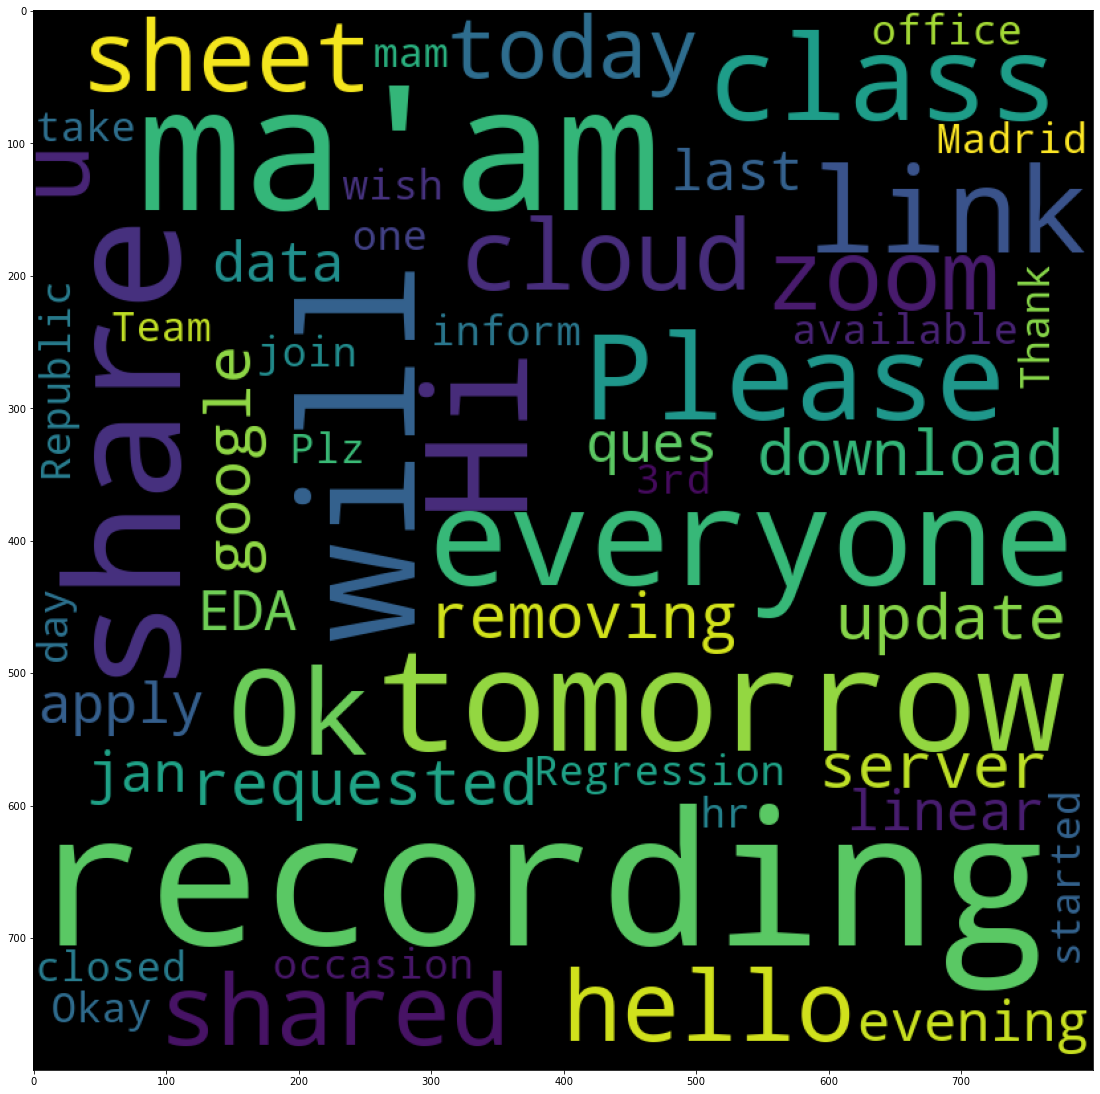

In [324]:
wordcloud=WordCloud(width=800,height=800,background_color="black",max_words=150).generate(text)
plt.figure(figsize=(15,15),facecolor=None)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.show()

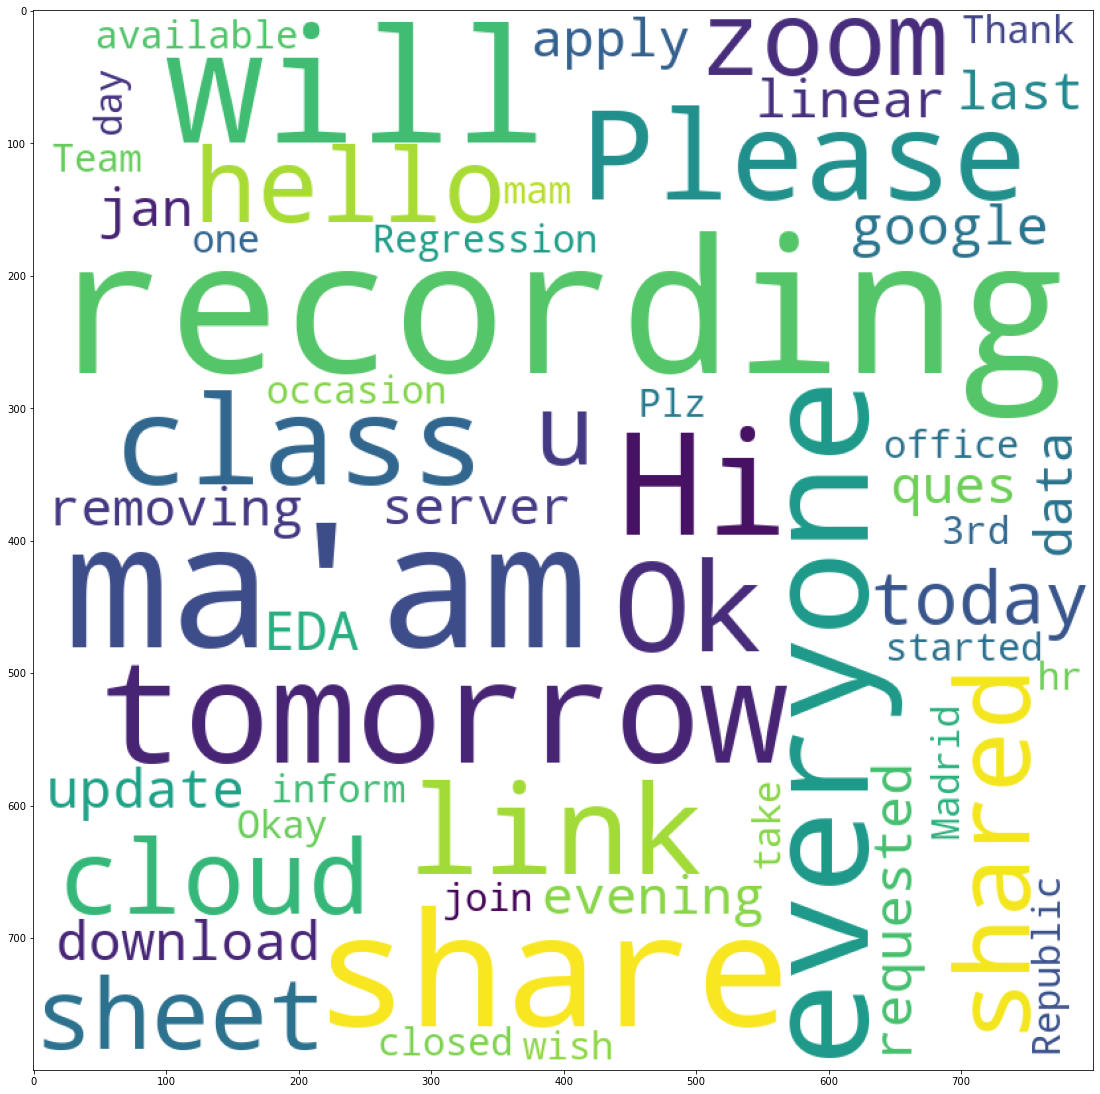

In [325]:
wordcloud=WordCloud(width=800,height=800,background_color="white",stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(15,15),facecolor=None)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.show()

# How many median shared in the chat ?

In [326]:
len(df[df["messages"]==" <Media omitted>\n"])

5

# How many links shared in the chat ?

In [327]:
extractor=URLExtract()
link=[]
for i in df["messages"]:
    if len(extractor.find_urls(i))!=0:
        link.append(extractor.find_urls(i))

In [328]:
link

[['https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho'],
 ['https://skills.yourlearning.ibm.com/activity/SN-COURSE-V1:COGNITIVECLASS+PY0101EN+V3?planId=PLAN-B6CBEFCA2BFD&sectionId=SECTION-B&planIdFromParentTab=PLAN-B6CBEFCA2BFD&sectionIdFromParentTab=SECTION-B&planIdForChildTab=PLAN-B6CBEFCA2BFD']]

In [329]:
len(link)

2

# Which was the most chating year ?

In [330]:
df["year"].value_counts()

2023    30
2022     1
Name: year, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


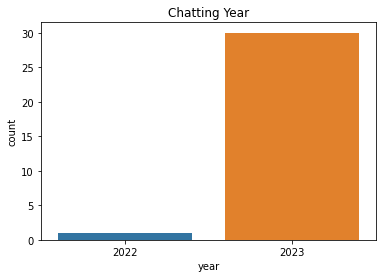

In [331]:
sns.countplot(df["year"]);
plt.title("Chatting Year");

In [332]:
# 2023 is the most chatting year.

# Find what is the most chatting month in each year?

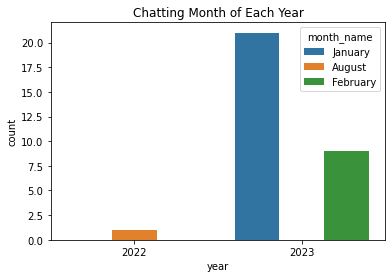

In [333]:
sns.countplot(data=df,x="year",hue="month_name");
plt.title("Chatting Month of Each Year");

# Which was the most chating month ?

In [334]:
df["month"].value_counts()

1    21
2     9
8     1
Name: month, dtype: int64

In [335]:
df["month_name"].value_counts()

January     21
February     9
August       1
Name: month_name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


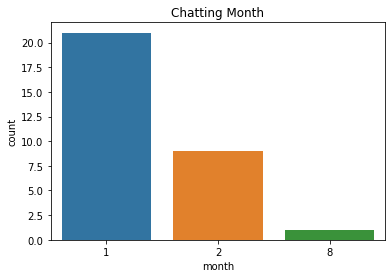

In [336]:
sns.countplot(df["month"]);
plt.title("Chatting Month");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


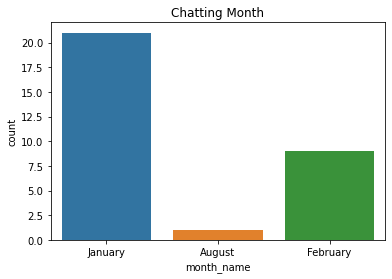

In [337]:
sns.countplot(df["month_name"]);
plt.title("Chatting Month");

In [338]:
# January is the most chatting month.

# Which was the most chating day ?

In [339]:
df["day"].value_counts()

25    5
21    4
11    3
16    3
18    3
26    3
10    2
22    2
30    2
8     2
14    2
Name: day, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


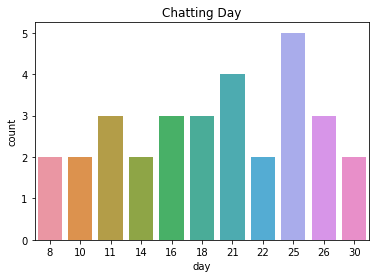

In [340]:
sns.countplot(df["day"]);
plt.title("Chatting Day");

In [341]:
# 25 is the most chatting day.

# Which was the most chating day name ?

In [342]:
df["day_name"].value_counts()

Wednesday    14
Tuesday       6
Thursday      5
Monday        4
Saturday      2
Name: day_name, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


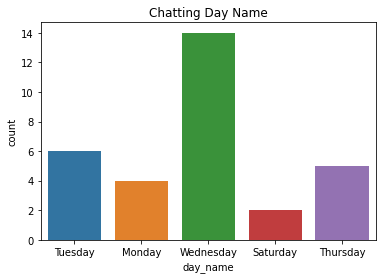

In [343]:
sns.countplot(df["day_name"]);
plt.title("Chatting Day Name");

In [344]:
# Wednesday is the most chatting day name.

# Make a line chart to find a most active month in each year.

In [345]:
timeline=df.groupby(["year","month"])["messages"].count().reset_index()
timeline

,year,month,messages
0,2022,8,1
1,2023,1,21
2,2023,2,9


In [346]:
time=[]
for i in range(timeline.shape[0]):
    time.append(str(timeline["month"][i])+"-"+str(timeline["year"][i]))
    

In [347]:
time

['8-2022', '1-2023', '2-2023']

In [348]:
timeline["time"]=time
timeline.head()

,year,month,messages,time
0,2022,8,1,8-2022
1,2023,1,21,1-2023
2,2023,2,9,2-2023


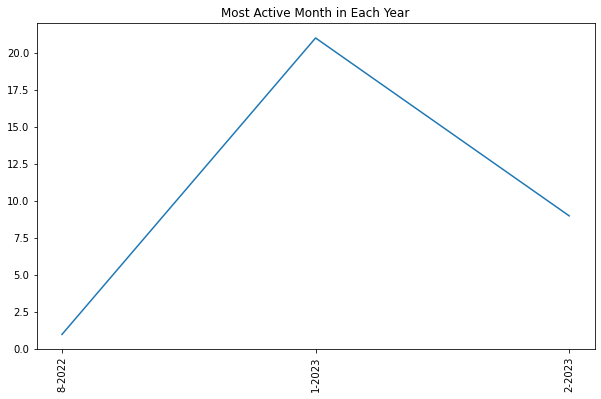

In [349]:
plt.figure(figsize=(10,6));
plt.plot(timeline["time"],timeline["messages"]);
plt.xticks(rotation=90);
plt.title("Most Active Month in Each Year");

# Find the active date of this group ?

In [350]:
date=df.groupby(["Date"])["messages"].count().reset_index()
date

,Date,messages
0,2022-08-22,1
1,2023-01-10,2
2,2023-01-11,3
3,2023-01-16,1
4,2023-01-18,3
5,2023-01-21,2
6,2023-01-25,5
7,2023-01-26,3
8,2023-01-30,2
9,2023-02-08,2


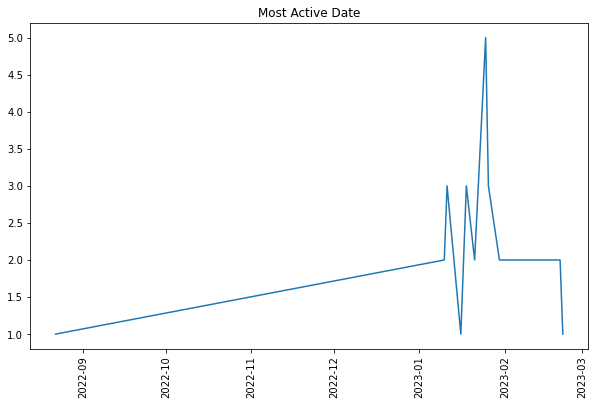

In [351]:
plt.figure(figsize=(10,6));
plt.plot(date["Date"],date["messages"]);
plt.xticks(rotation=90);
plt.title("Most Active Date");

# Find the active day and active month of the user ?

group notification
+91 82870 12906
Balmeet Mam Madrid
+91 98114 52967
Chamma
+91 99710 18062
kindly pick the user name for which u want to see his/her activeness with respect to day,month and yearChamma


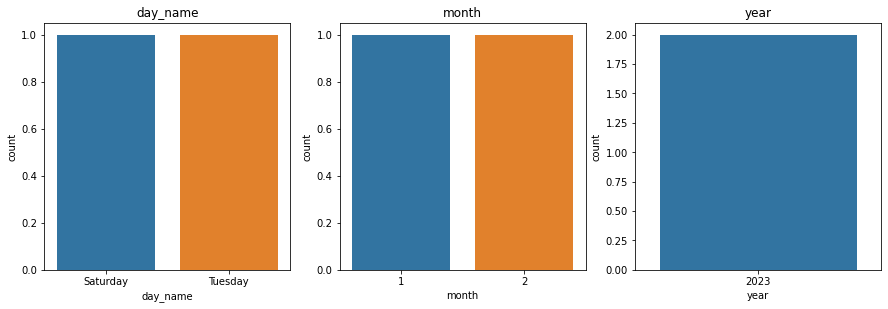

In [352]:
for i in df["user"].unique():
    if i!="group notifiation":
        print(i)
user=input("kindly pick the user name for which u want to see his/her activeness with respect to day,month and year")
user_df=df[df["user"]==user]
timeline=["day_name","month","year"]
pos=1
plt.figure(figsize=(15,10))
for i in timeline:
    plt.subplot(2,3,pos)
    sns.countplot(x=i,data=user_df)
    #plt.xticks(rotation=90)
    plt.title(i)
    plt.xlabel(i)
    pos=pos+1


# Find the most active hour ?

In [353]:
df["hour"].value_counts()

10    8
18    5
12    4
22    3
13    2
20    2
14    2
11    2
23    1
15    1
17    1
Name: hour, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


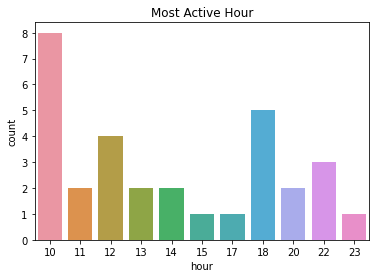

In [354]:
sns.countplot(df["hour"]);
plt.title("Most Active Hour");

# Find the active hour and message of the user ?

In [355]:
df.groupby(["user","hour"])["messages"].count().reset_index()

,user,hour,messages
0,+91 82870 12906,10,2
1,+91 82870 12906,11,2
2,+91 82870 12906,20,2
3,+91 98114 52967,10,1
4,+91 98114 52967,15,1
5,+91 98114 52967,18,2
6,+91 99710 18062,22,1
7,Balmeet Mam Madrid,10,5
8,Balmeet Mam Madrid,12,2
9,Balmeet Mam Madrid,14,2


In [356]:
# 10 Am is the most active hour.

# Find the active day of the differnt users ?

In [357]:
df.groupby(["user","day_name"])["messages"].count().reset_index()

,user,day_name,messages
0,+91 82870 12906,Monday,2
1,+91 82870 12906,Tuesday,2
2,+91 82870 12906,Wednesday,2
3,+91 98114 52967,Thursday,2
4,+91 98114 52967,Wednesday,2
5,+91 99710 18062,Wednesday,1
6,Balmeet Mam Madrid,Monday,1
7,Balmeet Mam Madrid,Saturday,1
8,Balmeet Mam Madrid,Thursday,3
9,Balmeet Mam Madrid,Tuesday,1


# From which time different users active most ?

In [358]:
df.head()

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages
0,2023-01-10 13:22:00,2023,January,10,13,1,Tuesday,2023-01-10,group notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-22 13:07:00,2022,August,22,13,8,Monday,2022-08-22,group notification,"Ruchika Madrid created group ""Weekdays 10.30@B..."
2,2023-01-10 12:40:00,2023,January,10,12,1,Tuesday,2023-01-10,group notification,Ruchika Madrid added you\n
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n


In [359]:
dates

['1/10/23, 13:22 - ',
 '8/22/22, 13:07 - ',
 '1/10/23, 12:40 - ',
 '1/11/23, 20:41 - ',
 '1/11/23, 20:42 - ',
 '1/11/23, 22:07 - ',
 '1/16/23, 23:30 - ',
 '1/18/23, 10:40 - ',
 '1/18/23, 10:42 - ',
 '1/18/23, 10:42 - ',
 '1/21/23, 12:28 - ',
 '1/21/23, 14:45 - ',
 '1/25/23, 12:27 - ',
 '1/25/23, 12:28 - ',
 '1/25/23, 14:37 - ',
 '1/25/23, 15:07 - ',
 '1/25/23, 17:55 - ',
 '1/26/23, 18:08 - ',
 '1/26/23, 18:09 - ',
 '1/26/23, 18:09 - ',
 '1/30/23, 10:41 - ',
 '1/30/23, 10:41 - ',
 '2/8/23, 22:41 - ',
 '2/8/23, 22:49 - ',
 '2/14/23, 11:58 - ',
 '2/14/23, 11:58 - ',
 '2/16/23, 10:39 - ',
 '2/16/23, 10:39 - ',
 '2/21/23, 18:11 - ',
 '2/21/23, 18:51 - ',
 '2/22/23, 10:40 - ']

In [360]:
dates=pd.DataFrame(dates)
dates.head()

,0
0,"1/10/23, 13:22 -"
1,"8/22/22, 13:07 -"
2,"1/10/23, 12:40 -"
3,"1/11/23, 20:41 -"
4,"1/11/23, 20:42 -"


In [361]:
dates.columns

RangeIndex(start=0, stop=1, step=1)

In [362]:
dates["time"]=dates[0].str.split(",",expand=True)[1]

In [363]:
dates.head()

,0,time
0,"1/10/23, 13:22 -",13:22 -
1,"8/22/22, 13:07 -",13:07 -
2,"1/10/23, 12:40 -",12:40 -
3,"1/11/23, 20:41 -",20:41 -
4,"1/11/23, 20:42 -",20:42 -


In [364]:
dates["time"].unique()

array([' 13:22 - ', ' 13:07 - ', ' 12:40 - ', ' 20:41 - ', ' 20:42 - ',
       ' 22:07 - ', ' 23:30 - ', ' 10:40 - ', ' 10:42 - ', ' 12:28 - ',
       ' 14:45 - ', ' 12:27 - ', ' 14:37 - ', ' 15:07 - ', ' 17:55 - ',
       ' 18:08 - ', ' 18:09 - ', ' 10:41 - ', ' 22:41 - ', ' 22:49 - ',
       ' 11:58 - ', ' 10:39 - ', ' 18:11 - ', ' 18:51 - '], dtype=object)

In [365]:
dates["time"]=dates["time"].str.split(" ",expand=True)[1]

In [366]:
dates.head()

,0,time
0,"1/10/23, 13:22 -",13:22
1,"8/22/22, 13:07 -",13:07
2,"1/10/23, 12:40 -",12:40
3,"1/11/23, 20:41 -",20:41
4,"1/11/23, 20:42 -",20:42


In [367]:
dates["time"].unique()

array(['13:22', '13:07', '12:40', '20:41', '20:42', '22:07', '23:30',
       '10:40', '10:42', '12:28', '14:45', '12:27', '14:37', '15:07',
       '17:55', '18:08', '18:09', '10:41', '22:41', '22:49', '11:58',
       '10:39', '18:11', '18:51'], dtype=object)

In [368]:
df.head()

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages
0,2023-01-10 13:22:00,2023,January,10,13,1,Tuesday,2023-01-10,group notification,Messages and calls are end-to-end encrypted. N...
1,2022-08-22 13:07:00,2022,August,22,13,8,Monday,2022-08-22,group notification,"Ruchika Madrid created group ""Weekdays 10.30@B..."
2,2023-01-10 12:40:00,2023,January,10,12,1,Tuesday,2023-01-10,group notification,Ruchika Madrid added you\n
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n


In [369]:
df["time"]=dates["time"]

In [370]:
df.head()

,message_date,year,month_name,day,hour,month,day_name,Date,user,messages,time
0,2023-01-10 13:22:00,2023,January,10,13,1,Tuesday,2023-01-10,group notification,Messages and calls are end-to-end encrypted. N...,13:22
1,2022-08-22 13:07:00,2022,August,22,13,8,Monday,2022-08-22,group notification,"Ruchika Madrid created group ""Weekdays 10.30@B...",13:07
2,2023-01-10 12:40:00,2023,January,10,12,1,Tuesday,2023-01-10,group notification,Ruchika Madrid added you\n,12:40
3,2023-01-11 20:41:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,hello Ma'am Please Share Todays Recording..\n,20:41
4,2023-01-11 20:42:00,2023,January,11,20,1,Wednesday,2023-01-11,+91 82870 12906,@918899712843\n,20:42


In [371]:
df.drop(columns=["message_date"],inplace=True)

In [372]:
df.head(2)

,year,month_name,day,hour,month,day_name,Date,user,messages,time
0,2023,January,10,13,1,Tuesday,2023-01-10,group notification,Messages and calls are end-to-end encrypted. N...,13:22
1,2022,August,22,13,8,Monday,2022-08-22,group notification,"Ruchika Madrid created group ""Weekdays 10.30@B...",13:07


In [373]:
df.groupby("user")["time"].value_counts()

user                time 
+91 82870 12906     10:41    2
                    11:58    2
                    20:41    1
                    20:42    1
+91 98114 52967     10:42    1
                    15:07    1
                    18:08    1
                    18:09    1
+91 99710 18062     22:49    1
Balmeet Mam Madrid  10:39    2
                    10:40    2
                    10:42    1
                    12:27    1
                    12:28    1
                    14:37    1
                    14:45    1
                    17:55    1
                    18:09    1
                    18:51    1
                    22:07    1
                    22:41    1
                    23:30    1
Chamma              12:28    1
                    18:11    1
group notification  12:40    1
                    13:07    1
                    13:22    1
Name: time, dtype: int64

In [374]:
# We can see the above which user active most in which time.